<a href="https://colab.research.google.com/github/SmileCat42/Deep-Learning/blob/main/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 3**
Krittaya Tantichaiyakul

1) Deep Neural Network for Fashion-MNIST Classification

- ใช้ชุดข้อมูล Fashion-MNIST จาก keras.datasets

- แบ่งข้อมูล train : test = 60000:10000

- สร้าง Neural Network ดังนี้:

I. Hidden layer 1: 256 neurons, activation = ReLU

II. Hidden layer 2: 128 neurons, activation = ReLU

III. Output layer: #class , activation = Softmax

 compile:

I. optimizer=&#39;rmsprop&#39;

II. loss=&#39;categorical_crossentropy&#39;

III. metrics=[&#39;accuracy&#39;]

In [94]:
from keras.datasets import fashion_mnist as KR

In [95]:
(train_x, train_y), (test_x, test_y) = KR.load_data()

In [96]:
import numpy as np

print(train_x.shape)
print(test_x.shape)
train_x[0]
np.max(train_y)

(60000, 28, 28)
(10000, 28, 28)


np.uint8(9)

In [97]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(256, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(128, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [98]:
from tensorflow.keras.utils import to_categorical

train_y = to_categorical(train_y, 10)
test_y  = to_categorical(test_y, 10)

In [99]:
network.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

## **งาน**
1. วาดโครงร่างโครงข่ายด้วยมือ

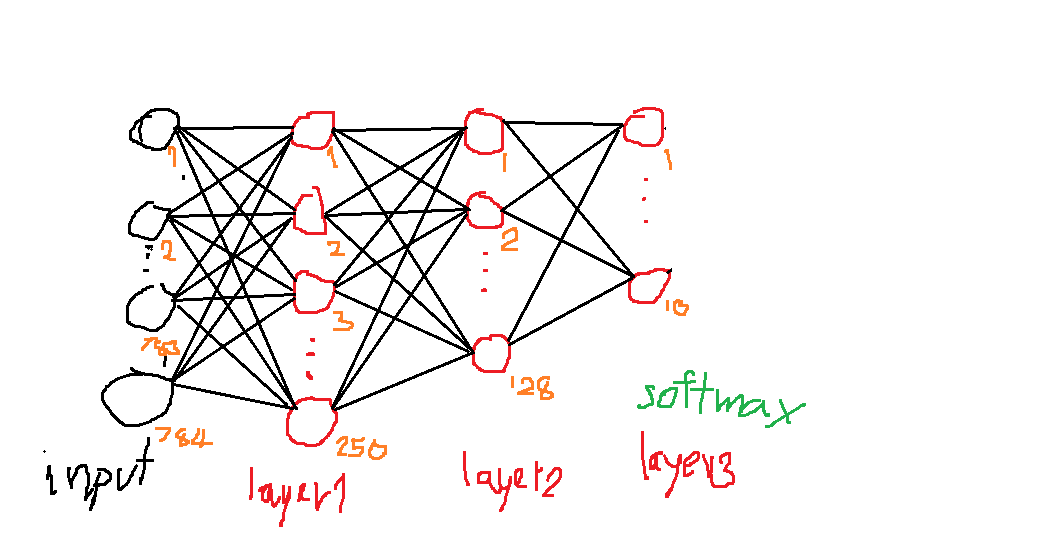

2. อธิบายการทำงานของแต่ละชั้น สรุปสั้นๆ 4 - 5 ขั้นตอน

ตอบ เริ่มต้นจากการเตรียมข้อมูล input ซึ่งเป็นเวกเตอร์ขนาด 784 ค่า
ข้อมูลจะถูกส่งเข้าสู่ Hidden Layer ที่ 1 ซึ่งประกอบด้วย 256 neurons
เพื่อทำการคำนวณและสกัดฟีเจอร์ระดับต้นของข้อมูล
จากนั้นผลลัพธ์จะถูกส่งต่อไปยัง Hidden Layer ที่ 2 ซึ่งมี 128 neurons
เพื่อสกัดฟีเจอร์ที่ซับซ้อนและสำคัญมากขึ้น
สุดท้ายข้อมูลจะถูกส่งไปยัง Output Layer ที่ใช้ Softmax
เพื่อแปลงผลลัพธ์ให้อยู่ในรูปของค่าความน่าจะเป็นของแต่ละคลาส

In [100]:
train_x = train_x.reshape(-1, 28*28)
test_x  = test_x.reshape(-1, 28*28)

In [101]:
network.fit(train_x, train_y, epochs=7, batch_size=128)

Epoch 1/7
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6461 - loss: 20.2651
Epoch 2/7
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7798 - loss: 0.7400
Epoch 3/7
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8250 - loss: 0.4994
Epoch 4/7
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8438 - loss: 0.4618
Epoch 5/7
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8531 - loss: 0.4282
Epoch 6/7
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8598 - loss: 0.4068
Epoch 7/7
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8591 - loss: 0.4041


## **2) Mini Deep Learning Model**
ข้อมูล:

x = [1.0, 2.0, 3.0] และ y_true = [10.0, 20.0, 30.0, 40.0]
โมเดล:

y_pred = ReLu(w * x)

loss = mean squared error = (1/n) sum((y_true - y_pred)^2)

In [102]:
import numpy as np

x = np.array([1.0, 2.0, 3.0])
y_true = [10.0, 20.0, 30.0, 40.0]

w = 0.5 * np.ones((3, 4))
b = np.zeros(4)

xw = x.dot(w) + b

def ReLu(z):
    return np.maximum(0, z)

y_pred = ReLu(xw)
print(y_pred)

[3. 3. 3. 3.]


In [103]:
def loss_fn(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

loss = loss_fn(y_true,y_pred)
print(loss)

609.0


แบบที่1 : ปรับน้ำหนักเอง
ให้ initial weight W = 0.5 * ones (3×4) และ b = [0, 0, 0, 0]

1. สุ่มเลือกสมาชิกตัว w ตัวใดก็ได้ใน W จำนวน 1 ตัว เพื่อลองปรับค่า w เพิ่มขึ้นหรือลด

## **รอบที่ 1 เลือกตำแหน่ง (1,2) เพิ่มค่า +1**

In [104]:
print("ก่อนเพิ่ม : ",w[1,2])
w[1,2]+=1
print("หลังเพิ่ม : ",w[1,2])
w

ก่อนเพิ่ม :  0.5
หลังเพิ่ม :  1.5


array([[0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 1.5, 0.5],
       [0.5, 0.5, 0.5, 0.5]])

In [105]:
xw = x.dot(w) + b
y_pred=ReLu(xw)
loss=loss_fn(y_true,y_pred)
print(loss)

583.0


## **รอบที่ 2 เลือกตำแหน่ง (0,3) เพิ่มค่า +5**

In [106]:
print("ก่อนเพิ่ม : ",w[0,3])
w[0,3]+=5
print("หลังเพิ่ม : ",w[0,3])
w

ก่อนเพิ่ม :  0.5
หลังเพิ่ม :  5.5


array([[0.5, 0.5, 0.5, 5.5],
       [0.5, 0.5, 1.5, 0.5],
       [0.5, 0.5, 0.5, 0.5]])

In [107]:
xw = x.dot(w) + b
y_pred=ReLu(xw)
loss=loss_fn(y_true,y_pred)
print(loss)

496.75


## **รอบที่ 3 เลือกตำแหน่ง (2,3) เพิ่มค่า +10**

In [108]:
print("ก่อนเพิ่ม : ",w[2,3])
w[2,3]+=10
print("หลังเพิ่ม : ",w[2,3])
w

ก่อนเพิ่ม :  0.5
หลังเพิ่ม :  10.5


array([[ 0.5,  0.5,  0.5,  5.5],
       [ 0.5,  0.5,  1.5,  0.5],
       [ 0.5,  0.5,  0.5, 10.5]])

In [109]:
xw = x.dot(w) + b
y_pred=ReLu(xw)
loss=loss_fn(y_true,y_pred)
print(loss)

241.75
